Show that $\log (n!) \in \Theta (n \log n)$

Upper Bound: Show that $\log (n!) \in O(n\log n)$

$\log (n!) \leq \log (1 \times 2 \times 3 \times \cdots \times (n - 1) \times n) \leq \log (\underbrace{n \times n \times \cdots \times n}_{n \texttt{ factors}}) = \log (n^n) = n\log n$

Choosing $c = 1$ and $n_0 = 1$, we have $\log (n!) \in O(n\log n)$

Lower Bound: Show that $\log (n!) \in \Omega(n\log n)$

$\log (n!) \geq \log (1 \times 2 \times 3 \times \cdots \times (n - 1) \times n) \geq \log \left(\underbrace{\frac{n}{2} \times (\frac{n}{2} + 1) \times \cdots \times n}_{\approx n/2 \text{ factors}}\right) \geq \log \left(\underbrace{\frac{n}{2} \times \frac{n}{2} \times \cdots \times \frac{n}{2}}_{\approx n/2 \text{ factors}}\right) = \log \left(\frac{n}{2}\right)^{n/2} = \frac{n}{2}\log \left(\frac{n}{2}\right) = \frac{n}{2} \log n - \frac{n}{2} \log 2 = \frac{n}{2} \log n - \frac{n}{2} \underbrace{\geq}_{(\log n)/2 \geq 1} \frac{n}{2} \log n - \frac{n}{2} \left(\frac{\log n}{2}\right) = \frac{n}{2} \log n - \frac{n}{4} \log n = \frac{n}{4} \log n$

This proof requires $\frac{\log n}{2} \geq 1 \iff \log n \geq 2 \iff n \geq 2^2 = 4$

Choosing $c = \frac{1}{4}$ and $n_0 = 4$, we have $\log (n!) \in \Omega(n\log n)$

Binary Search is an effective way to search for a value in a sorted array, but it is not the most natural choice for human beings.

For example, when we search for a person's name in our phone contacts list, we would try to estimate where in the list the name would be, e.g., if a name starts with W, we would start checking some point near the end of the list, whereas if a name starts with C, we would start checking some point near the start of the list. We would estimate the location instead of blindly checking the middle index every time.

This idea of estimating the index to check is applied to **Interpolation Search**. Here is an example, where we have a subarray, ranging from indices 200 to 300, with index 200 containing the value 500, and index 300 containing the value 900.

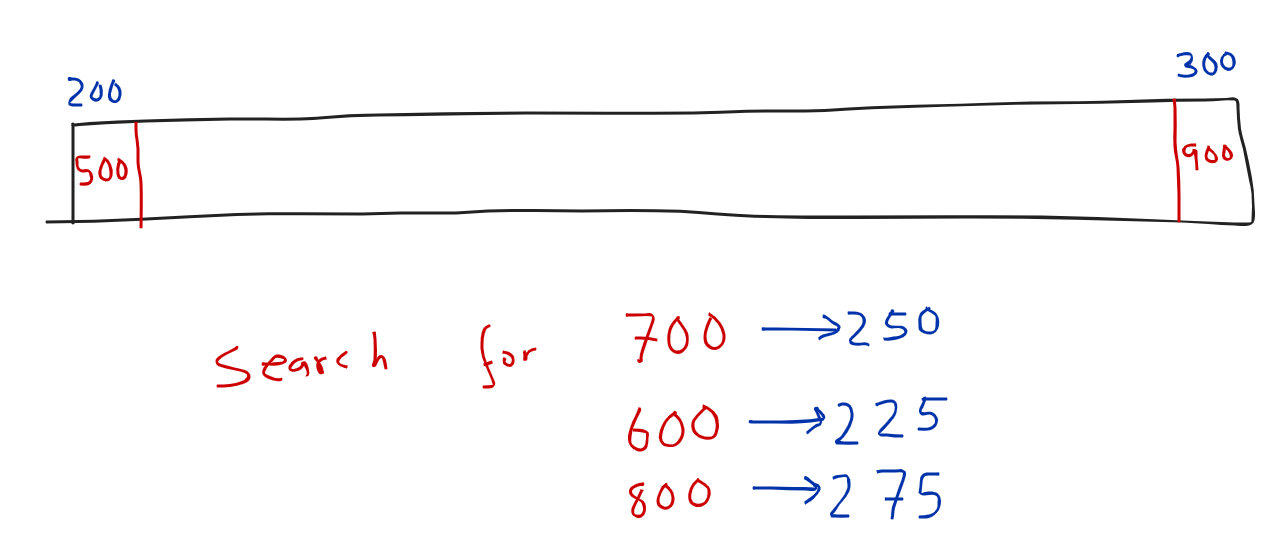

For example, when searching for 600, we observe that 600 is one-fourth of the way in the range from 500 to 900, so the index we guess should be the index which is one-fourth of the way from the range 200 to 300, which would be index 225.

How do we mathematically determine that 600 is one-fourth of this range? We consider the distance from 600 to 500 and compare it with the distance from 900 to 500, i.e., $\frac{600 - 500}{900 - 500} = \frac{1}{4}$

We guessed index 225, because we wanted to check the index that is also one-fourth of the range, i.e., $\frac{225 - 200}{300 - 200} = \frac{1}{4}$

Let us now try to derive a precise formula to determine the estimated index. We consider the distance between the target value and the leftmost value relative to the distance between the rightmost value and the leftmost value, and estimate that the indices would follow a similar distribution, i.e.,

$\frac{target - A[left]}{A[right] - A[left]} = \frac{m - left}{right - left}$

$\implies m = left + \frac{target - A[left]}{A[right] - A[left]} (right - left)$


For interpolation search, we use the formula derived above to determine which index to check (applying floor/ceiling on the division to ensure the result is an integer). Everything else is the same as binary search.

In [ ]:
def interpolationSearch (lst, target, left = 0, right = len (lst) - 1):
  # the first difference is that if the target is not in the range between
  # the first and last elements, we immediately return False
  if right < left or target < lst[left] or target > lst[right]:
    return False
  # the second difference between interpolation search and binary search is
  # how to choose the value of m
  m = left + (right - left) * (target - lst[left]) // (lst[right] - lst[left])
  if target == lst[m]:
    return m
  elif target < lst[m]:
    return interpolationSearch (lst, target, left, m - 1)
  else:
    return interpolationSearch (lst, target, m + 1, right)

NameError: name 'lst' is not defined

In [ ]:
# Python-compatible code

def interpolationSearch (lst, target, left = 0, right = "DUMMY"):
  if right == "DUMMY":
    right = len (lst) - 1
  if right < left or target < lst[left] or target > lst[right]:
    return False
  m = left + (right - left) * (target - lst[left]) // (lst[right] - lst[left])
  print ("Checking index", m)
  if target == lst[m]:
    return m
  elif target < lst[m]:
    return interpolationSearch (lst, target, left, m - 1)
  else:
    return interpolationSearch (lst, target, m + 1, right)

lst = [500, 505, 512.5, 549, 600, 635, 700, 736, 892, 899, 900]

print (interpolationSearch (lst, 700))
print (interpolationSearch (lst, 600))
print (interpolationSearch (lst, 800))

# demonstrate worst-case
lst2 = [500, 500, 500, 500, 500, 500, 500, 500, 500, 501, 900]
lst3 = [500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 900]
print (interpolationSearch (lst2, 501))
print (interpolationSearch (lst3, 509))

Checking index 5
Checking index 6
6
Checking index 2
Checking index 4
4
Checking index 7
False
Checking index 0
Checking index 1
Checking index 2
Checking index 3
Checking index 4
Checking index 5
Checking index 6
Checking index 7
Checking index 8
Checking index 9
9
Checking index 0
Checking index 1
Checking index 2
Checking index 3
Checking index 4
Checking index 5
Checking index 6
Checking index 7
Checking index 8
Checking index 9
9


When should we use Binary Search vs Interpolation Search?

Let's analyze the runtimes.

For Binary Search:

Best-Case Runtime: $\Theta (1)$ if the target happens to be at the first index we check

Worst-Case Runtime: $\Theta (\log n)$ if the target is not in the array, so we recursively keep calling binary search, reducing the subarray size by half, until the size becomes 0, which takes roughly $\log_2 n$ recursions.

Average-Case Runtime: It depends on the input distribution, but usually $\Theta (\log n)$

For Interpolation Search:

Best-Case Runtime: $\Theta (1)$ if the target happens to be at the first index we check. This is guaranteed to arise if the elements form an arithmetic sequence, i.e., the distance between consecutive values is always the same.

Worst-Case Runtime: $\Theta (n)$ if the subarray size keeps reducing by only 1 every time. This is unlikely, but there does exist some inputs like this, e.g., searching for $n - 1$ in the array $[1, 2, 3, \ldots, n - 2, n - 1, n^n]$

Average-Case Runtime: Depends on the input distribution, as usual. However, if the values are generated by a uniform distribution, then the average-case runtime is $\Theta (\log \log n)$.

Generated by a uniform distribution: we can consider each value as being generated randomly, with every value having equal probability.

**MERGESORT**

First, we consider a different problem:

Given two sorted arrays, return a single sorted array with all the elements from the two input arrays.

Solution: We use the **Merge** Algorithm

How it works: We maintain two indices, $i$ and $j$, for the first and second arrays respectively, both initialized to 0 (first index).

At each iteration, we compare the value at index $i$ of the first array with the value at index $j$ of the second array. Whichever is smaller is added to the output, and its corresponding index ($i$ for first array, $j$ for second array) advances by 1.

When one array is completed ($i$ or $j$ goes out of bounds), the remaining elements of the other array are added to the end

In [ ]:
def merge (lstA, lstB):
  i = 0
  j = 0
  out = []

  while True:
    if i >= len (lstA):   # lstA is done
      out.extend (lstB[j:])   # add the rest of lstB to lstA
      break
    if j >= len (lstB):   # lstB is done
      out.extend (lstA[i:])
      break

    if lstA[i] <= lstB[j]:
      out.append (lstA[i])
      i += 1
    else:
      out.append (lstB[j])
      j += 1
  return out

lst1 = [2, 5, 10, 11, 15, 45, 60, 98]
lst2 = [-40, 0.4, 1, 11.5, 17, 78, 100, 225]

print (merge (lst1, lst2))

# Runtime in terms of m and n, where m = len (lstA) and n = len (lstB)
# Theta (size of output) = Theta (m + n) for ALL cases

[-40, 0.4, 1, 2, 5, 10, 11, 11.5, 15, 17, 45, 60, 78, 98, 100, 225]


**MergeSort:** This is a sorting algorithm, i.e., it reads a single array as input and returns a sorted permutation of the same array

How it works: Split the array into two halves. Recursively sort both of them. Then combine the two sorted halves using the Merge algorithm. The base case for recursion is when the array has size 1, which is always already sorted and can be returned immediately.

In [ ]:
def mergeSort (lst):
  if len (lst) == 1:
    return lst
  mid = len (lst) // 2
  lefthalf = lst[:mid]
  righthalf = lst[mid:]
  lefthalfsorted = mergeSort (lefthalf)
  righthalfsorted = mergeSort (righthalf)
  return merge (lefthalfsorted, righthalfsorted)

lst = [5, 10, 11, 2, 15, 60, 45, 98, 1, 11.5, 17, 225, 0.4, -40, 78, 100]
print (mergeSort (lst))

# Runtime: Consider each level of recursion separately.
# For a given level of recursion, the total runtime for all
# the merge functions is Theta (n)
# There are log_2 (n) levels of recursion, because the array size
# decreases by half for each level, from n down to 1
# Therefore, total runtime is Theta (n log n)

[-40, 0.4, 1, 2, 5, 10, 11, 11.5, 15, 17, 45, 60, 78, 98, 100, 225]


So far, when discussing the runtime for recursive algorithms, we had to carefully consider what happens in the algorithm and reason about the runtime. Is there a more general technique that does NOT require deeply understanding all the details of what the function is doing? Yes, by constructing and solving a recurrence relation.

Recurrence Relation: a function whose definition includes applying the same function (usually to a different argument). That is, for a function $T(n)$, the definition involves using $T()$ itself, possibly with a different argument.

How do we analyze the runtime for a recursive function?

We define $T(n)$ to denote the runtime of the function for input of size $n$ (if there are multiple inputs, then we can add more arguments).

Then we examine the pseudocode/code and find the runtime for all steps EXCEPT the recursive calls.

For the recursive calls, we denote the runtime using the same $T()$ function, where the argument denotes the size of the input for the recursive call.

Example: Binary Search

Excluding the recursive calls, everything else takes $\Theta (1)$ time. There is one recursive call, and it's on a subarray of size $\frac{n}{2}$

$T(n) = \Theta (1) + T\left(\frac{n}{2}\right)$

Example 2: MergeSort

Excluding the recursive calls, everything else takes $\Theta (n)$ time. There are two recursive calls, and both are on subarrays of size $\frac{n}{2}$

$T(n) = \Theta (n) + 2T\left(\frac{n}{2}\right)$

Once we derive a recurrence relation, the next step is to solve the recurrence relation!

MergeSort requires $\Theta (n)$ auxiliary space, because an extra output array is required for the Merge algorithm (which we can reuse for every merge). This is much more than InsertionSort and BubbleSort (both requiring $\Theta (1)$ additional space only)

By Master's Theorem, the runtime for MergeSort solves to $\Theta (n \log n)$ for all cases.

This is much better than InsertionSort/BubbleSort in the worst-case, but InsertionSort is still slightly better in the best-case (when the array is already sorted or nearly sorted).